<center><h1>MPA 2065: Sample Notebook</h1></center>
<center><h2>Paul Stey</h2></center>
<center><h3>2021-09-14</h3></center>



# Introduction
This assignment will involve implementing several statistical modeling approaches from scratch. That is, we will examine the formula for a given statistical test or modeling technique, and then proceed to write the function(s) that implement the technique using only R's language "primitives" (e.g., loops, vectors, arrays, arithmetic and logical operations).

---

In [1]:
library(ggplot2)

# 1. Pearson's $\chi^2$ Test

In this section we will implement a function to perform Pearson's $\chi^2$ goodness-of-fit test. Recall the formula for the $\chi^2$ goodness-of-fit test is: 

$$\chi^{2}=\sum _{i=1}^{n}{{\frac {(O_{i}-E_{i})}{E_{i}}}^{2}}$$

where $O_i$ is the observed count for category $i$ and $E_i$ is the expected count in category $i$ under the null hypothesis.

## 1.1 The $\chi^2$ Statistic

We begin begin by writing a function that will compute the actual $\chi^2$ test statistic. This function `chisq_stat()` will take a single argument, `x`, which is a single-row `table` object, as we would create with the `table()` function.

In [2]:
# Write a function that returns the chi-square test statistic
chisq_stat <- function(x) {
    n <- length(x)      # number of categories
    m <- sum(x)         # total observations across all categories
    pr <- 1/n           # probability of being in a given category 
    e <- rep(m * pr, m) # expected number in each category
    chisq <- 0
    
    # Iterate over `n` categories in `x` and update 
    # the value of `chisq` at each iteration. Then 
    # return `chisq` value
    for (i in 1:n) {
        diff <- ((x[i] - e[i])^2)/e[i]
        chisq <- chisq + diff
    }
    names(chisq) <- NULL
    return(chisq)
}

### 1.1.1 Testing our `chisq_stat()` Function
Below are a few simple tests of our `chisq_stat()` function. They are taking an input (`table` object) and returning the $\chi^2$ statistic derived using the formula above.

In [3]:
# Testing our `chisq_stat()` function. 
people <- table(c("m", "f", "f", "f", "m", "f", "f", "m", "m", "f", "f", "f", "f"))
pets <- table(c("dog", "cat", "cat", "cat", "dog", "bird", "dog", "bird", "cat", "dog", "bird", "cat"))

round(chisq_stat(people), 4) == 1.9231
chisq.test(pets) 

[1] TRUE

Warning message in chisq.test(pets):
“Chi-squared approximation may be incorrect”



	Chi-squared test for given probabilities

data:  pets
X-squared = 0.5, df = 2, p-value = 0.7788


## 1.2 Associated _p_-Value

Next, we will need to obtain the _p_-value associated with the $\chi^2$ test statistic. This is done using the `pchisq()` function in R. Note that by default the `pchisq()` function assumes we want the integral over the lower tail of the distribution. In our case, we actually want the upper tail, so we must adjust the default setting when we call the function. Also note that we will need to pass the degrees-of-freedom parameter, which is $k - 1$ in our case (where $k$ is the number of categories for our categorical input variable).

In [4]:
chisq_pval <- function(stat, df) {
    # obtain the p-value associated with a chi-squared statistic
    pval <- pchisq(stat, df = df, lower.tail = FALSE)
    return(pval)
}

In [5]:
chisq.test(people)


	Chi-squared test for given probabilities

data:  people
X-squared = 1.9231, df = 1, p-value = 0.1655


In [6]:
pchisq(1.9231, df = 1, lower.tail = FALSE)

[1] 0.1655153

# 2 Linear Regression

Linear regression is one of the most commonly used and flexible approaches for modeling continuous data. The linear regression model is specified as 

$$ y_i = \beta_0 + \beta_1 x_{i1} + ... + \beta_p x_{ip} + \epsilon_i $$

where $\beta$s are regression coefficients we want to estimate, $y_i$ is the observed dependent variable for observation $i$ and $x_{i1}$ is the observed predictor variable 1 for observation $i$.

Linear regression models can be estimated using a number of methods. Notably, there exists a closed form solution for computing regression coefficients. That is, we can arrive at the solution using an algebraic computation. In particular, the equation below solves for the regression coefficients. 

$$ \hat{\boldsymbol {\beta }}=(\mathbf {X} ^{\mathsf {T}}\mathbf {X} )^{-1}\mathbf {X} ^{\mathsf {T}}\mathbf {y} $$

## 2.1 Define `linreg` Function to Obtain $\hat{\beta}$

Below we define our own function to compute the linear regression parameter estimates. Note that I say "_our own_" because R (not surprisingly) has a built-in function for computing linear regression parameter estimates (i.e., see the `lm()` function documentation).

In [7]:
linreg <- function(X, y) {
    beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y  # equation for linear regression
    return(beta_hat)
}

## 2.2 Define Simulation Parameters

In [8]:
n <- 10000                  # set our sample size

betas <- c(3, 2.5)          # define beta values (i.e., regression parameters)

eps <- rnorm(n)             # draw errors from standard normal dist'

X <- cbind(1, rnorm(n))     # define matrix of predictors

y <- X %*% betas + eps      # compute `y` as function of `X` and error (i.e., `eps`)

## 2.3 Test our `linreg()` Function

In [9]:
b <- linreg(X, y)           # "recover" regression parameters (i.e., betas)

print(b)

         [,1]
[1,] 3.005996
[2,] 2.500557


In [10]:
delta <- betas - b          # compute difference between true beta values and our estimates
 
all(delta < 0.1)            # confirm difference is small-ish

[1] TRUE

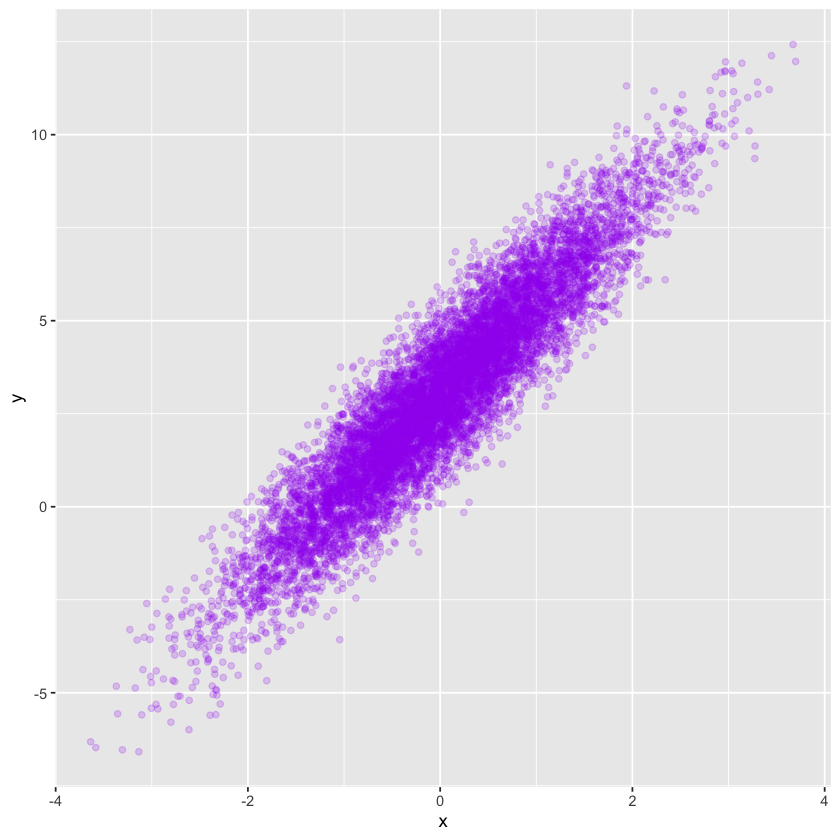

In [11]:
dat <- data.frame(y = y, x = X[, 2])

ggplot(dat, aes(x = x, y = y)) +
  geom_jitter(colour = "purple", alpha = 0.2)

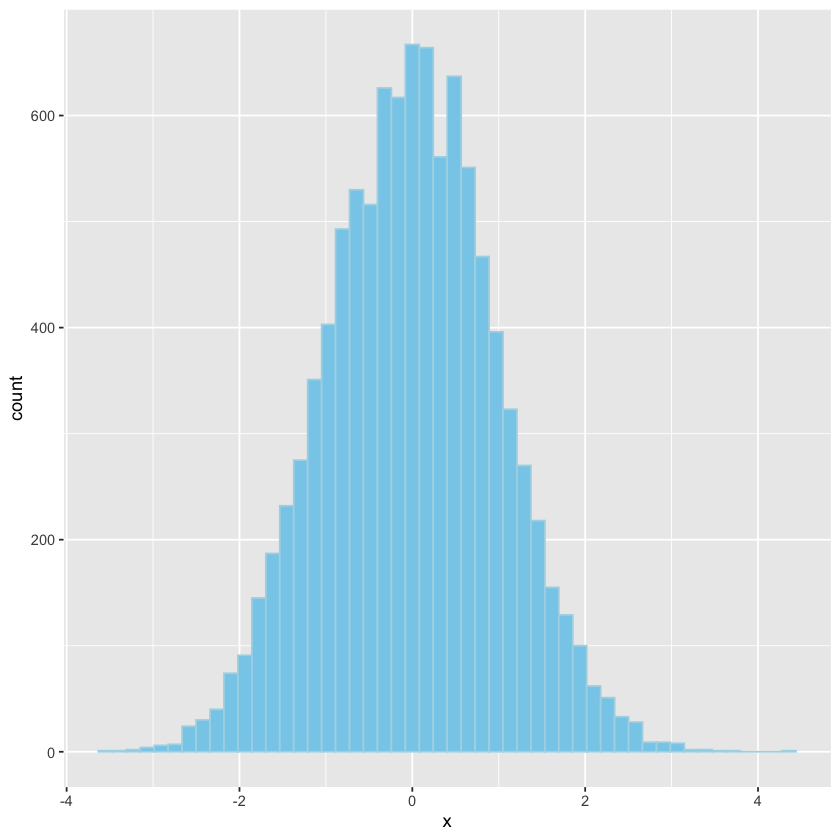

In [102]:
ggplot(dat, aes(x = x)) +
  geom_histogram(bins = 50, 
                 colour = "lightblue", 
                 fill = "skyblue")